# ** Introduction **

### Hello, in this notebook I will do some experiments to figure out the best Machine Learning algorithm on this data and try to tune them to get highest success.  After tuning I will compare them to find best one of the following 6 models.

### <a href="#eda">EDA</a>
### <a href="#visual">Visual EDA</a>
### <a href="#prep">Data Preprocess</a>

### <a href="#mls">Machine Learning Models</a>
*  <a href="#lr"> Logistic Regression</a>
*  <a href="#knn"> KNN</a>
*  <a href="#svm">SVM</a>
*  <a href="#rf">Random Forest</a>
*  <a href="#dc">Decision Tree</a>
*  <a href="#nb">Naive Bayes</a>

### <a href="#res">Results and Comparisons</a>

<a id="eda"></a>
## ** Exploratory Data Analysis **

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
DataFrame = pd.read_csv("../input/pulsar_stars.csv")  

### Investigating the Dataset

In [3]:
DataFrame.head()    # first 5 rows of whole columns

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


### Looking to Dtypes and amounts of values

In [4]:
DataFrame.info()   # information about data types and amount of non-null rows of our Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


(Bonus) data types are all numeric and non-null, I don't need to do any transformations or cleaning.

### Statistical Investigation

In [5]:
DataFrame.describe()   # statistical information about our data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [6]:
DataFrame.corr()    # correlation between fields

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness of the DM-SNR curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


<a id="visual"></a>
## ** Visual EDA **

In [7]:
import matplotlib.pyplot as plt    # basic plotting library
import seaborn as sns              # more advanced visual plotting library

### ** PairPlot **  (each column is compared the others and itself)

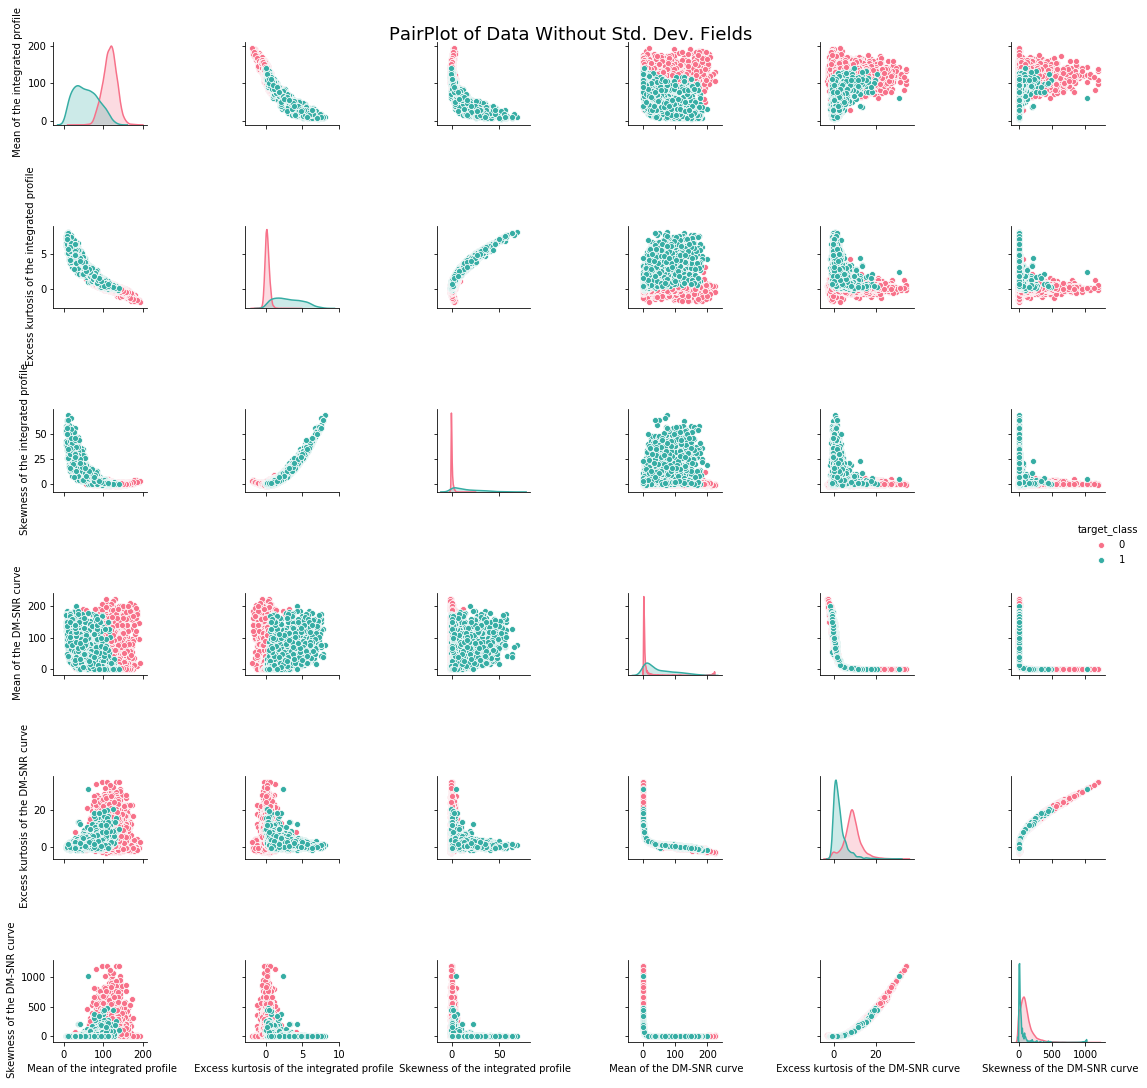

In [8]:
sns.pairplot(data=DataFrame,
             palette="husl",
             hue="target_class",
             vars=[" Mean of the integrated profile",
                   " Excess kurtosis of the integrated profile",
                   " Skewness of the integrated profile",
                   " Mean of the DM-SNR curve",
                   " Excess kurtosis of the DM-SNR curve",
                   " Skewness of the DM-SNR curve"])

plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)

plt.tight_layout()
plt.show()   # pairplot without standard deviaton fields of data

we can see that our data is quite separable on most of the columns

### ** Correlation HeatMap **

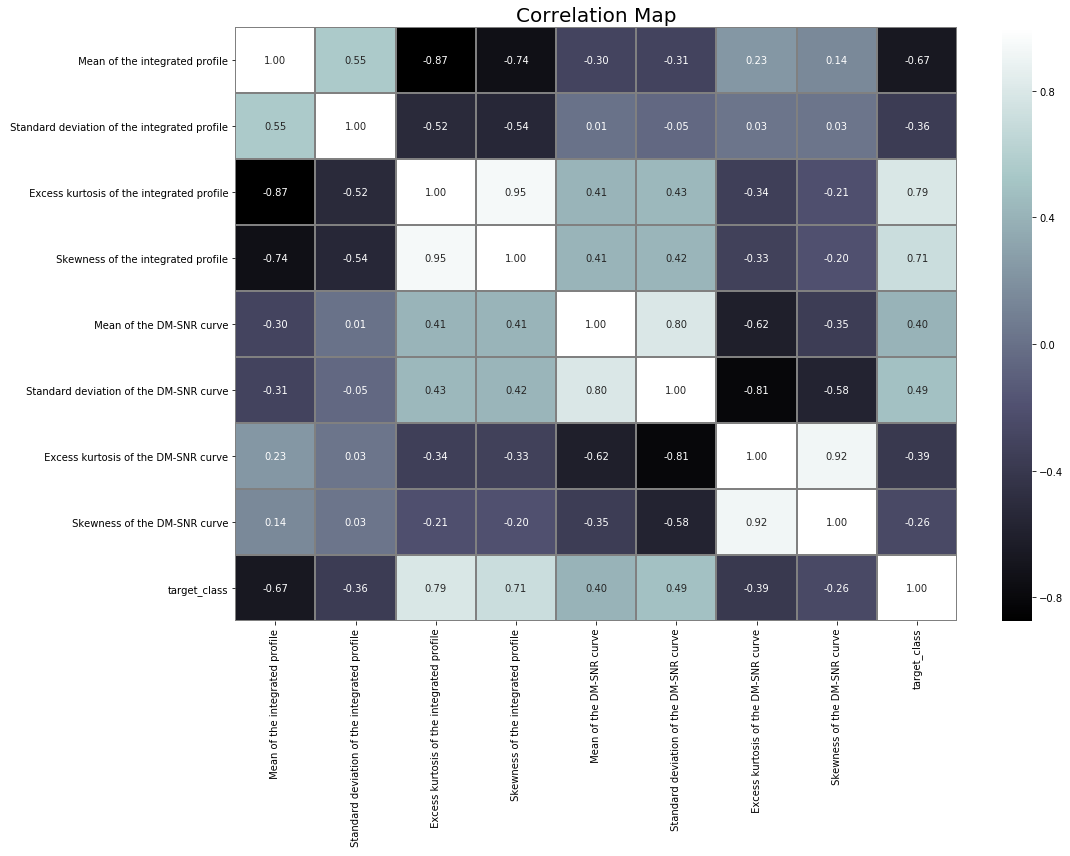

In [9]:
plt.figure(figsize=(16,12))
sns.heatmap(data=DataFrame.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="gray")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()      # lightest and darkest cells are most correlated ones

Most of our Columns are already related or derived from one or another. And we can see it clearly on some Cells above

### ** ViolinPlot **  (act as a boxplot but we can see amounts too)

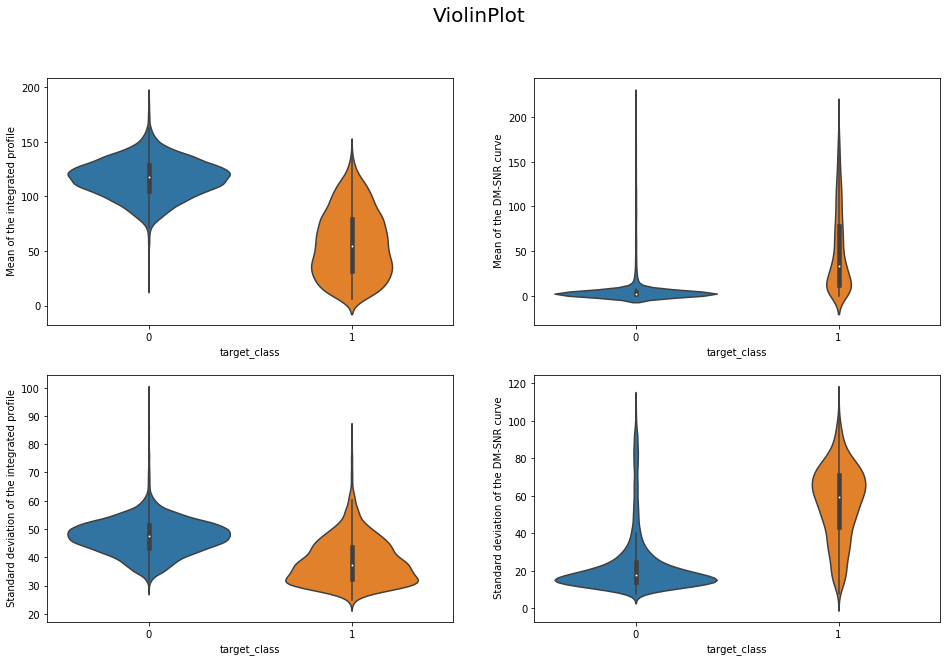

In [10]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.violinplot(data=DataFrame,y=" Mean of the integrated profile",x="target_class")

plt.subplot(2,2,2)
sns.violinplot(data=DataFrame,y=" Mean of the DM-SNR curve",x="target_class")

plt.subplot(2,2,3)
sns.violinplot(data=DataFrame,y=" Standard deviation of the integrated profile",x="target_class")

plt.subplot(2,2,4)
sns.violinplot(data=DataFrame,y=" Standard deviation of the DM-SNR curve",x="target_class")


plt.suptitle("ViolinPlot",fontsize=20)

plt.show()

We can see that our data has different kind of distributions which is helpful for training our models.

<a id="prep"></a>
## ** Data PreProcessing **

### Splitting the Feature and Label fields

In [11]:
labels = DataFrame.target_class.values

DataFrame.drop(["target_class"],axis=1,inplace=True)

features = DataFrame.values

### Scaling the Features  

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

features_scaled = scaler.fit_transform(features)

###  Splitting the Train and the Test rows

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_scaled,labels,test_size=0.2)

## ** Machine Learning Models **
<a id="mls"></a>

<a id="lr"></a>
### ** Logistic Regression **

In [14]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42,solver="liblinear",C=1.6,penalty="l1")

lr_model.fit(x_train,y_train)

y_head_lr = lr_model.predict(x_test)

lr_score = lr_model.score(x_test,y_test)

<a id="dc"></a>
### ** Decision Tree Classifier **

In [15]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier(random_state=42)

dc_model.fit(x_train,y_train)

y_head_dc = dc_model.predict(x_test)

dc_score = dc_model.score(x_test,y_test)

<a id="rf"></a>
### ** Random Forest Classifier **

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=37,random_state=42,max_leaf_nodes=200,criterion="entropy")

rfc_model.fit(x_train,y_train)

y_head_rfc = rfc_model.predict(x_test)

rfc_score = rfc_model.score(x_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


   <a id="nb"></a>
  ### ** Naive Bayes Classifier **

In [17]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(x_train,y_train)

y_head_nb = nb_model.predict(x_test)

nb_score = nb_model.score(x_test,y_test)

<a id="knn"></a>
### ** K Nearest Neighbors **

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7,weights="distance")

knn_model.fit(x_train,y_train)

y_head_knn = knn_model.predict(x_test)

knn_score = knn_model.score(x_test,y_test)

<a id="svm"></a>
### ** Support Vector Machine **


In [19]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42,C=250,gamma=1.6,kernel="poly",probability=True)

svm_model.fit(x_train,y_train)

y_head_svm = svm_model.predict(x_test)

svm_score = svm_model.score(x_test,y_test)

<a id="res"></a>
## ** Model Evaluating **

### ** Confusion Matrix **

In [20]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_dc = confusion_matrix(y_test,y_head_dc)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_rfc = confusion_matrix(y_test,y_head_rfc)
cm_svm = confusion_matrix(y_test,y_head_svm)

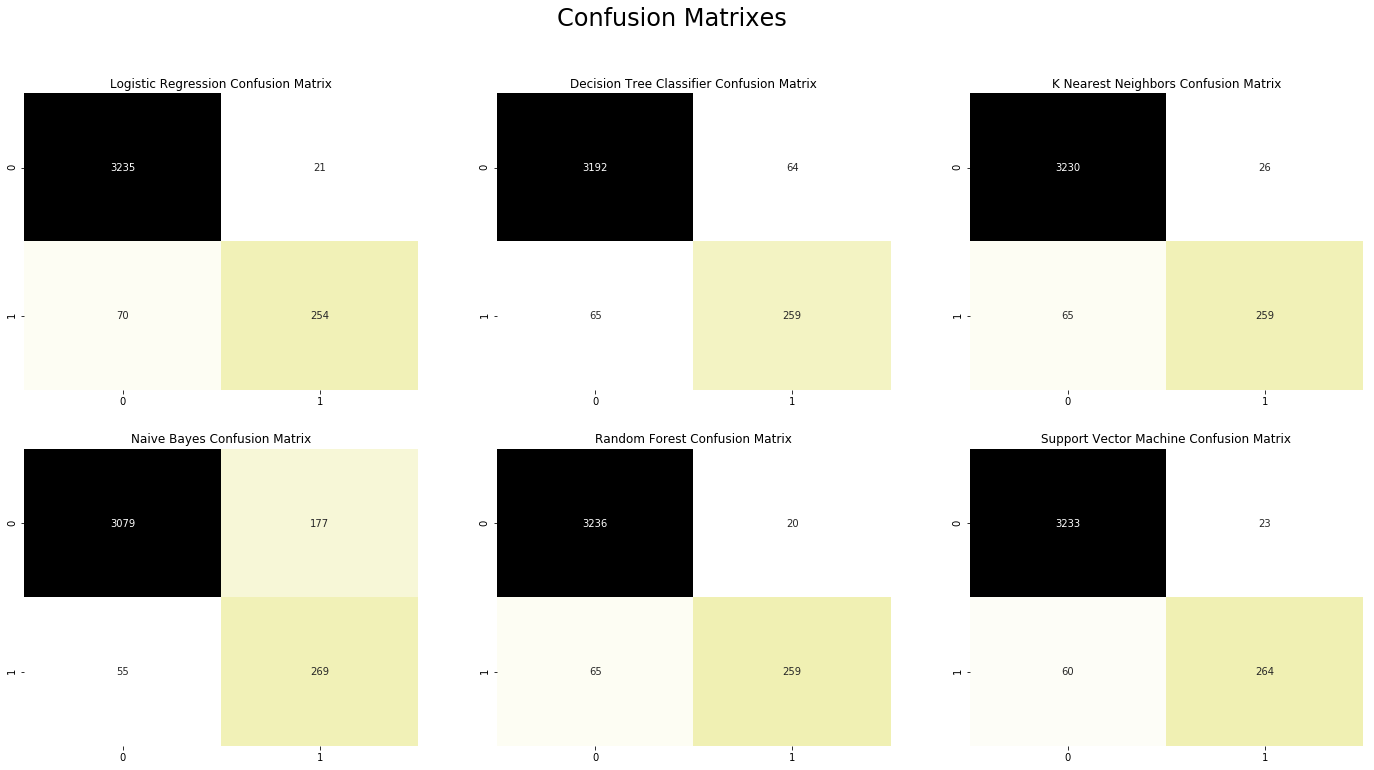

In [21]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dc,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rfc,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,6)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.show()

if we compare total mistakes:  RandomForest, SVM, KNN seem to be best for this dataset

### ** Bar Chart Comparison  ** 

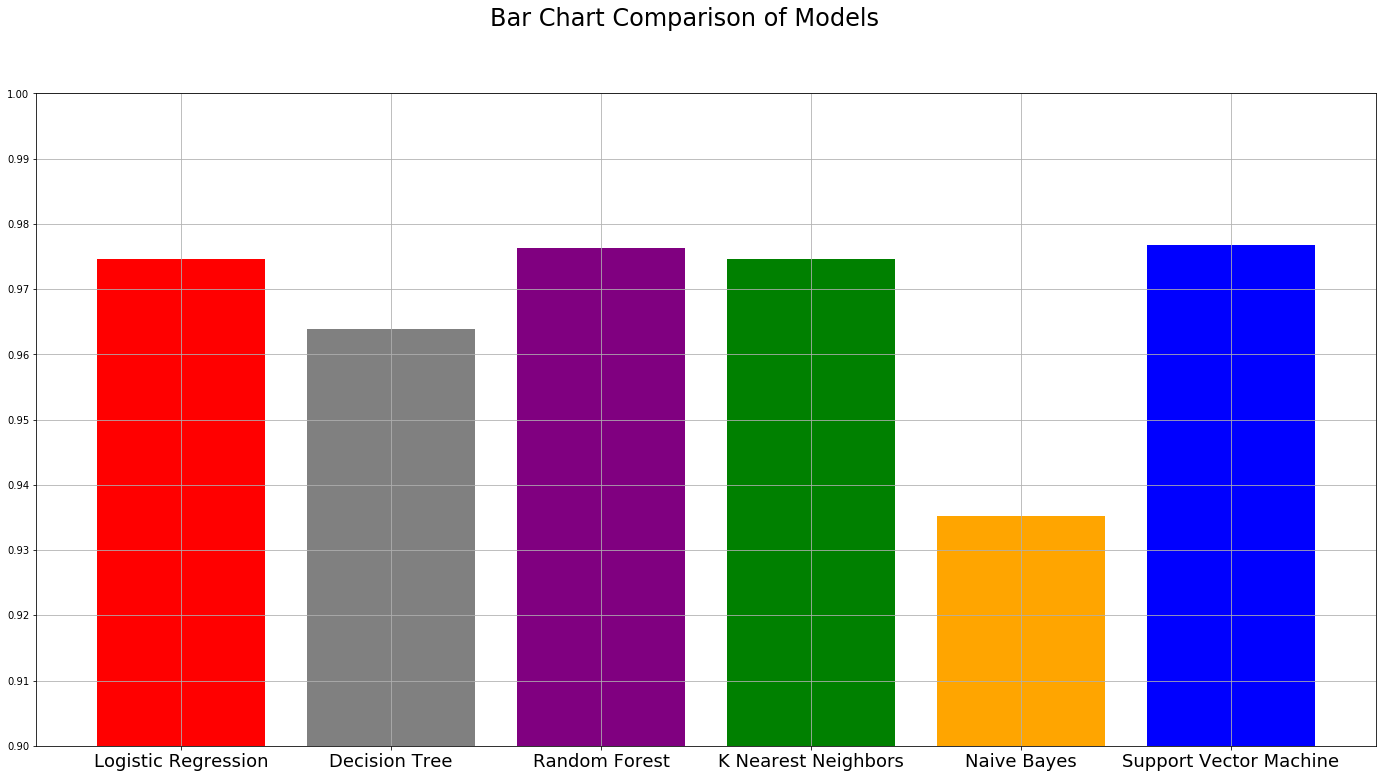

In [22]:
algorithms = ("Logistic Regression","Decision Tree","Random Forest","K Nearest Neighbors","Naive Bayes","Support Vector Machine")
scores = (lr_score,dc_score,rfc_score,knn_score,nb_score,svm_score)
y_pos = np.arange(1,7)
colors = ("red","gray","purple","green","orange","blue")

plt.figure(figsize=(24,12))
plt.xticks(y_pos,algorithms,fontsize=18)
plt.yticks(np.arange(0.00, 1.01, step=0.01))
plt.ylim(0.90,1.00)
plt.bar(y_pos,scores,color=colors)
plt.grid()
plt.suptitle("Bar Chart Comparison of Models",fontsize=24)
plt.show()



if we look at the graph and check the scores, LogisticRegression, RandomForest and SVM are better than the others.

# ** Conclusion **

### After my tests I see that:
### RandomForest and SVM are Overall winnners in my case above.
But all of these 6 models did a great job on predicting 

In [23]:
# thanks for reading. Votes, Comments and Advices are all welcome :) 